In [1]:
from scipy.integrate import quad
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM as flcdm
def kpc_per_arcsec(z):
    angular_distance = flcdm(H0=70,Om0=0.3).angular_diameter_distance(z).to_value()
    arc_scale = angular_distance*np.pi*1000/(180*3600)
    return(arc_scale)
from astropy.io import fits
import numpy as np
hdu1 = fits.open('/Users/lpr/Data/lirg_project/output/catalog/goodsn_Huangall_candels_radec_van_zmasssfr8sfrhuangsfr.fits')[1].data
hdu2 = fits.open('/Users/lpr/Data/lirg_project/output/catalog/goodss_Huangall_candels_radec_van_zmasssfr8sfrhuangsfr.fits')[1].data
hdu3 = fits.open('/Users/lpr/Data/lirg_project/output/catalog/egs_Huangall_candels_radec_van_zmasssfr8sfrhuangsfr.fits')[1].data
# # Huang(2021) selected galaxies with 0.8<z<1.3
hdu1 = hdu1[np.where((hdu1['Separation_CANDELS_16']<1)&(hdu1['z_used']>0.8)&(hdu1['z_used']<1.3))]
hdu2 = hdu2[np.where((hdu2['Separation_CANDELS_16']<1)&(hdu2['z_used']>0.8)&(hdu2['z_used']<1.3))]
hdu3 = hdu3[np.where((hdu3['Separation_CANDELS_16']<1)&(hdu3['z_used']>0.8)&(hdu3['z_used']<1.3)&(hdu3['ID']!=-1))]#&(hdu3['MASS']>1))]
# hdu1 = hdu1[np.where((hdu1['f_f160w']==0)|(hdu1['f_f160w']==1))]
# hdu2 = hdu2[np.where((hdu2['f_f160w']==0)|(hdu2['f_f160w']==1))]
# hdu3 = hdu3[np.where((hdu3['f_f160w']==0)|(hdu3['f_f160w']==1))]
# for num1 in range(0,len(hdu1)):
#     hdu1[num1]['re_f160w'] = hdu1[num1]['re_f160w']*kpc_per_arcsec(hdu1[num1]['z_used'])
# for num2 in range(0,len(hdu2)):
#     hdu2[num2]['re_f160w'] = hdu2[num2]['re_f160w']*kpc_per_arcsec(hdu2[num2]['z_used'])
# for num3 in range(0,len(hdu3)):
#     hdu3[num3]['re_f160w'] = hdu3[num3]['re_f160w']*kpc_per_arcsec(hdu3[num3]['z_used'])

In [33]:
agn_1 = hdu1[np.where(hdu1['L4P5EX']>=10**9.5)]#
agn_2 = hdu2[np.where(hdu2['L4P5EX']>=10**9.5)]#
agn_3 = hdu3[np.where(hdu3['L4P5EX']>=10**9.5)]#
# non_agn1 = hdu1[np.where(hdu1['L4P5EX']<10**9.5)]
# non_agn2 = hdu2[np.where(hdu2['L4P5EX']<10**9.5)]
# non_agn3 = hdu3[np.where(hdu3['L4P5EX']<10**9.5)]

In [34]:
print('hdu1:'+str(len(hdu1)))
print('hdu2:'+str(len(hdu2)))
print('hdu3:'+str(len(hdu3)))
len(hdu1)+len(hdu2)+len(hdu3)

hdu1:322
hdu2:101
hdu3:33


456

In [5]:
normal1 = hdu1[np.where(hdu1['LIR_FULL']<11)]
normal2 = hdu2[np.where(hdu2['LIR_FULL']<11)]
normal3 = hdu3[np.where(hdu3['LIR_FULL']<11)]
# lirg1 = hdu1[np.where((hdu1['LIR_FULL']>11)&(hdu1['LIR_FULL']<12))]
# lirg2 = hdu2[np.where((hdu2['LIR_FULL']>11)&(hdu2['LIR_FULL']<12))]
# lirg3 = hdu3[np.where((hdu3['LIR_FULL']>11)&(hdu3['LIR_FULL']<12))]
ulirg1 = hdu1[np.where(hdu1['LIR_FULL']>11)]
ulirg2 = hdu2[np.where(hdu2['LIR_FULL']>11)]
ulirg3 = hdu3[np.where(hdu3['LIR_FULL']>11)]

normal_n = np.concatenate((normal1['n_f160w'],normal2['n_f160w'],normal3['n_f160w']),axis=0)
# lirg_n = np.concatenate((lirg1['n_f160w'],lirg2['n_f160w'],lirg3['n_f160w']),axis=0)
ulirg_n = np.concatenate((ulirg1['n_f160w'],ulirg2['n_f160w'],ulirg3['n_f160w']),axis=0)

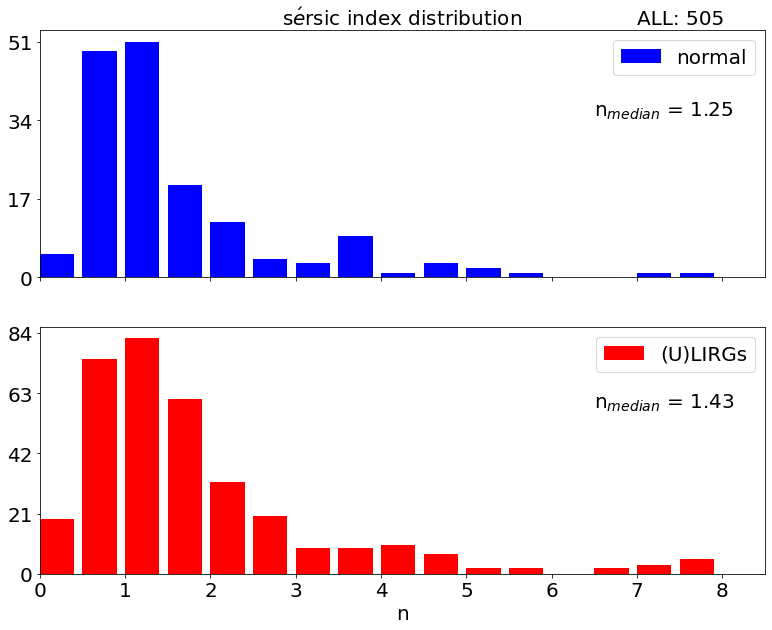

In [17]:
plt.figure(figsize=(13,10))
ax1 = plt.subplot(211)#=============================================================================
plt.hist(normal_n,bins=16,color='blue',linewidth=3,align='mid',range=[0,8],label='normal',width=0.4)
plt.legend(fontsize=20)
plt.text(7,55,'ALL: '+str(len(np.concatenate((normal_n,ulirg_n),axis=0))),fontsize=20)# plt.text(7,55,'ALL: '+str(len(np.concatenate((normal_n,lirg_n,ulirg_n),axis=0))),fontsize=20)
plt.text(6.5,35,'n$_{median}$ = '+str(np.around(np.median(normal_n),2)),fontsize=20)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.title(r's$\acute{e}$rsic index distribution',fontsize=20)
plt.xlim(0,8.5)
plt.yticks(ticks=np.arange(0,55,17),fontsize=20)# plt.yticks(ticks=np.arange(0,55,10),labels=np.around(100*np.arange(0,55,10)/(len(normal_n)),1),fontsize=20)
# ax2 = plt.subplot(312,sharex=ax1)#=============================================================================
# plt.hist(lirg_n,bins=16,color='green',linewidth=3,align='mid',range=[0,8],label='LIRGs',width=0.4)
# plt.legend(fontsize=20)
# plt.text(6.5,50,'n$_{median}$ = '+str(np.around(np.median(lirg_n),2)),fontsize=20)
# plt.setp(ax2.get_xticklabels(), visible=False)
# plt.xlim(0,8.5)
# plt.yticks(ticks=np.arange(0,90,20),fontsize=20)
# plt.ylabel('counts',fontsize=20)
ax3 = plt.subplot(212,sharex=ax1)#=============================================================================
plt.hist(ulirg_n,bins=16,color='red',linewidth=3,align='mid',range=[0,8],label='(U)LIRGs',width=0.4)
plt.legend(fontsize=20)
plt.text(6.5,58,'n$_{median}$ = '+str(np.around(np.median(ulirg_n),2)),fontsize=20)
plt.yticks(ticks=np.arange(0,85,21),fontsize=20)
plt.xlabel('n',fontsize=20)
plt.xlim(0,8.5)
plt.xticks(ticks=np.arange(0,8.5,1),fontsize=20)
plt.savefig('/Users/lpr/Documents/paper latex/LIR_n.pdf')

In [2]:
n_all = np.concatenate((hdu1['n_f160w'],hdu2['n_f160w'],hdu3['n_f160w']),axis=0)# n_all = np.concatenate((normal_n,lirg_n,ulirg_n),axis=0)

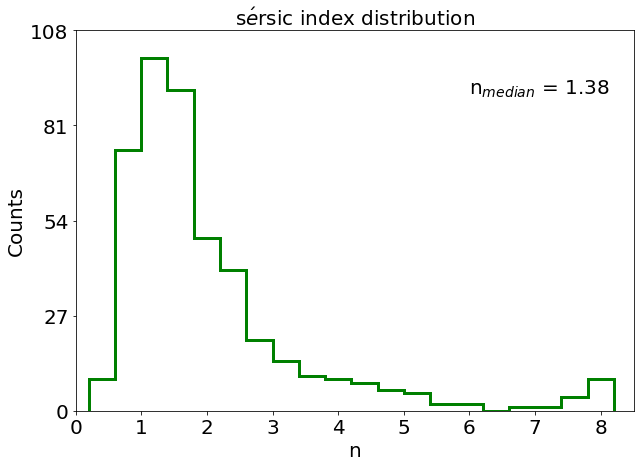

In [56]:
plt.figure(figsize=(10,7))
plt.hist(n_all,bins=20,histtype='step',color='green',linewidth=3,align='right',range=[0,8])
plt.yticks(ticks=np.arange(0,120,27),fontsize=20)# plt.yticks(ticks=np.arange(0,121,24),labels=np.around(100*np.arange(0,121,24)/len(n_all),1),fontsize=20)
# plt.text(7,122,'ALL: '+str(len(n_all)),fontsize=20)
plt.text(6,90,'n$_{median}$ = '+str(np.around(np.median(n_all),2)),fontsize=20)
plt.xticks(ticks=np.arange(0,8.5,1),fontsize=20)
plt.ylabel('Counts',fontsize=20)
plt.xlim(0,8.5)
plt.xlabel('n',fontsize=20)
plt.title(r's$\acute{e}$rsic index distribution',fontsize=20)
plt.savefig('/Users/lpr/Documents/paper latex/n.pdf')

In [8]:
normal_re = np.concatenate((normal1['re_f160w'],normal2['re_f160w'],normal3['re_f160w']),axis=0)
# lirg_re = np.concatenate((lirg1['re_f160w'],lirg2['re_f160w'],lirg3['re_f160w']),axis=0)
ulirg_re = np.concatenate((ulirg1['re_f160w'],ulirg2['re_f160w'],ulirg3['re_f160w']),axis=0)

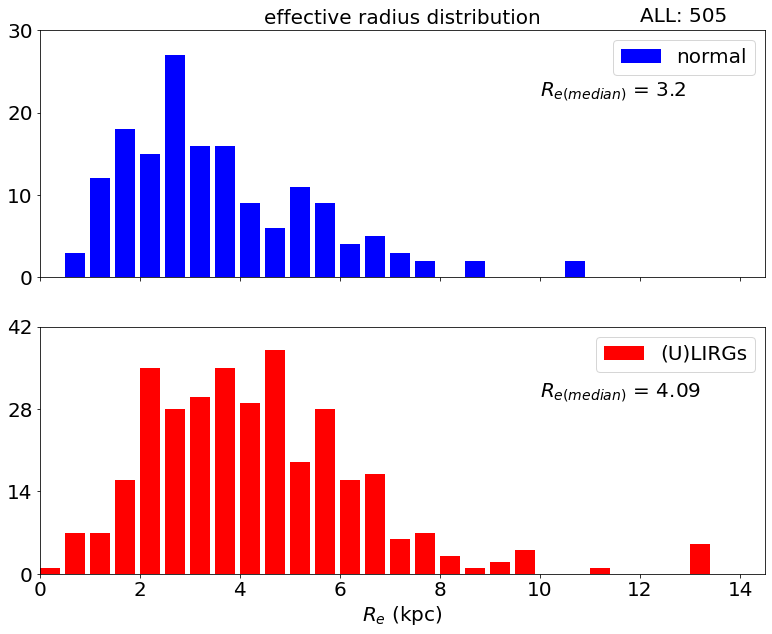

In [34]:
plt.figure(figsize=(13,10))
ax1 = plt.subplot(211)#=============================================================================
plt.hist(normal_re,bins=28,color='blue',linewidth=3,align='mid',range=[0,14],label='normal',width=0.4)
plt.legend(fontsize=20)
plt.text(12,31,'ALL: '+str(len(np.concatenate((normal_re,ulirg_re),axis=0))),fontsize=20)# plt.text(12,31,'ALL: '+str(len(np.concatenate((normal_re,lirg_re,ulirg_re),axis=0))),fontsize=20)
plt.text(10,22,'$R_{e(median)}$ = '+str(np.around(np.median(normal_re),2)),fontsize=20)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.title('effective radius distribution',fontsize=20)
plt.xlim(0,14.5)
plt.yticks(ticks=np.arange(0,35,10),fontsize=20)
# ax2 = plt.subplot(312,sharex=ax1)#=============================================================================
# plt.hist(lirg_re,bins=28,color='green',linewidth=3,align='mid',range=[0,14],label='LIRGs',width=0.4)
# plt.legend(fontsize=20)
# plt.text(10,25,'$R_{e(median)}$ = '+str(np.around(np.median(lirg_re),2)),fontsize=20)
# plt.setp(ax2.get_xticklabels(), visible=False)
# plt.xlim(0,14.5)
# plt.ylabel('counts',fontsize=20)
# plt.yticks(ticks=np.arange(0,50,11),fontsize=20)
ax3 = plt.subplot(212,sharex=ax1)#=============================================================================
plt.hist(ulirg_re,bins=28,color='red',linewidth=3,align='mid',range=[0,14],label='(U)LIRGs',width=0.4)
plt.legend(fontsize=20)
plt.text(10,30,'$R_{e(median)}$ = '+str(np.around(np.median(ulirg_re),2)),fontsize=20)
plt.xlim(0,14.5)
plt.yticks(ticks=np.arange(0,44,14),fontsize=20)
plt.xlabel(r'$R_e$ (kpc)',fontsize=20)
plt.xticks(ticks=np.arange(0,14.5,2),fontsize=20)
plt.savefig('/Users/lpr/Documents/paper latex/LIR_re.pdf')

In [9]:
re_all = np.concatenate((hdu1['re_f160w'],hdu2['re_f160w'],hdu3['re_f160w']),axis=0)# re_all = np.concatenate((normal_re,lirg_re,ulirg_re),axis=0)

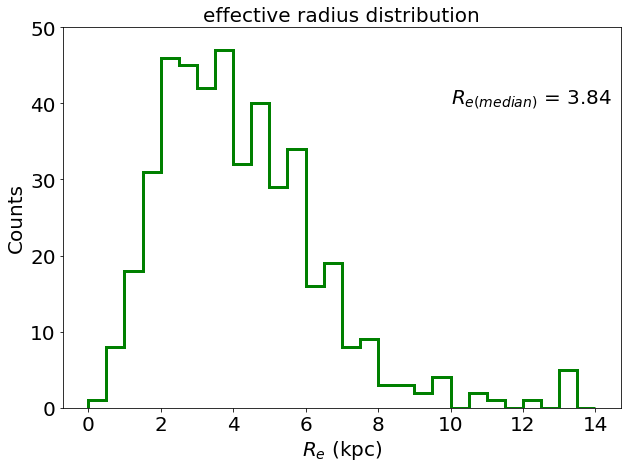

In [61]:
plt.figure(figsize=(10,7))
plt.hist(re_all,bins=28,histtype='step',color='green',linewidth=3,align='mid',range=[0,14])
# plt.text(12,61,'ALL: '+str(len(re_all)),fontsize=20)
plt.text(10,40,'$R_{e(median)}$ = '+str(np.around(np.median(re_all),2)),fontsize=20)
plt.yticks(ticks=np.arange(0,51,10),fontsize=20)
plt.xticks(ticks=np.arange(0,14.5,2),fontsize=20)
plt.ylabel('Counts',fontsize=20)
plt.xlabel('$R_e$ (kpc)',fontsize=20)
plt.title(r'effective radius distribution',fontsize=20)
plt.savefig('/Users/lpr/Documents/paper latex/re.pdf')

In [ ]:
disky = n_all[np.where(n_all<=2)]

In [11]:
print(len(disky)/len(n_all))
print(len(hdu1)+len(hdu2)+len(hdu3))
print(len(disky))

0.5273522975929978
457
241


In [2]:
agn1 = hdu1[np.where(hdu1['TMP_CLASS'][:,0] == 1)]
agn2 = hdu2[np.where(hdu2['TMP_CLASS'][:,0] == 1)]
agn3 = hdu3[np.where(hdu3['TMP_CLASS'][:,0] == 1)]
#agn2 = agn1[np.where(agn1['L4P5EX']/agn1['E4P5EX']>3)]
composite1 = hdu1[np.where(hdu1['TMP_CLASS'][:,0] == 2)]
composite2 = hdu2[np.where(hdu2['TMP_CLASS'][:,0] == 2)]
composite3 = hdu3[np.where(hdu3['TMP_CLASS'][:,0] == 2)]
sf1 = hdu1[np.where(hdu1['TMP_CLASS'][:,0] == 3)]
sf2 = hdu2[np.where(hdu2['TMP_CLASS'][:,0] == 3)]
sf3 = hdu3[np.where(hdu3['TMP_CLASS'][:,0] == 3)]
# quiescent1 = hdu1[np.where(hdu1['TMP_CLASS'][:,0] == 4)]
# quiescent2 = hdu2[np.where(hdu2['TMP_CLASS'][:,0] == 4)]
# quiescent3 = hdu3[np.where(hdu3['TMP_CLASS'][:,0] == 4)]
# blue_compact1 = hdu1[np.where(hdu1['TMP_CLASS'][:,0] == 5)]
# blue_compact2 = hdu2[np.where(hdu2['TMP_CLASS'][:,0] == 5)]
# blue_compact3 = hdu3[np.where(hdu3['TMP_CLASS'][:,0] == 5)]

In [4]:
print('agn')
print('hdu1:'+str(len(agn1)))
print('hdu2:'+str(len(agn2)))
print('hdu3:'+str(len(agn3)))
print(len(agn1)+len(agn2)+len(agn3))
print('agn_l4.5')
print('hdu1:'+str(len(agn_1)))
print('hdu2:'+str(len(agn_2)))
print('hdu3:'+str(len(agn_3)))
print(len(agn1)+len(agn2)+len(agn3))
print('composite')
print('hdu1:'+str(len(composite1)))
print('hdu2:'+str(len(composite2)))
print('hdu3:'+str(len(composite3)))
print(len(composite1)+len(composite2)+len(composite3))
print('sf')
print('hdu1:'+str(len(sf1)))
print('hdu2:'+str(len(sf2)))
print('hdu3:'+str(len(sf3)))
print(len(sf1)+len(sf2)+len(sf3))

agn
hdu1:38
hdu2:9
hdu3:3
50
agn_l4.5
hdu1:52
hdu2:12
hdu3:5
50
composite
hdu1:109
hdu2:23
hdu3:10
142
sf
hdu1:151
hdu2:48
hdu3:15
214


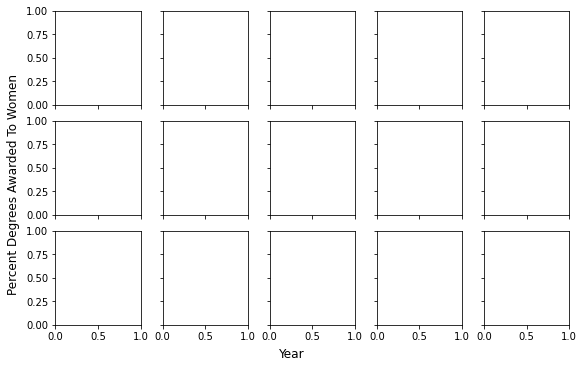

In [3]:
fig, axs = plt.subplots(3, 5, figsize=(8, 5), constrained_layout=True,
                        sharex=True, sharey=True)

# fname = get_sample_data('percent_bachelors_degrees_women_usa.csv',
#                         asfileobj=False)
# gender_degree_data = np.genfromtxt(fname, delimiter=',', names=True)

# majors = ['Health Professions', 'Public Administration', 'Education',
#           'Psychology', 'Foreign Languages', 'English',
#           'Art and Performance', 'Biology',
#           'Agriculture', 'Business',
#           'Math and Statistics', 'Architecture', 'Physical Sciences',
#           'Computer Science', 'Engineering']

# for nn, ax in enumerate(axs.flat):
#     ax.set_xlim(1969.5, 2011.1)
#     column = majors[nn]
#     column_rec_name = column.replace('\n', '_').replace(' ', '_')

#     line, = ax.plot('Year', column_rec_name, data=gender_degree_data,
#                     lw=2.5)
#     ax.set_title(column, fontsize='small', loc='left')
#     ax.set_ylim([0, 100])
#     ax.grid()
fig.supxlabel('Year')
fig.supylabel('Percent Degrees Awarded To Women')

plt.show()

In [4]:
agn_n = np.concatenate((agn1['n_f160w'],agn2['n_f160w'],agn3['n_f160w']),axis=0)
composite_n = np.concatenate((composite1['n_f160w'],composite2['n_f160w'],composite3['n_f160w']),axis=0)
sf_n = np.concatenate((sf1['n_f160w'],sf2['n_f160w'],sf3['n_f160w']),axis=0)
# blue_compact_n = np.concatenate((blue_compact1['n_f160w'],blue_compact2['n_f160w'],blue_compact3['n_f160w']),axis=0)
# agn_l4p5_n = np.concatenate((agn_1['n_f160w'],agn_2['n_f160w'],agn_3['n_f160w']),axis=0)

In [40]:
# d1=agn_n[np.where((agn_n<2)&(agn_n>0))]
# d2=composite_n[np.where((composite_n<2)&(composite_n>0))]
# d3=sf_n[np.where((sf_n<2)&(sf_n>0))]
# d4=agn_l4p5_n[np.where(agn_l4p5_n<2)]
# print(len(d1),len(d2),len(d3),len(d4))
# print(len(agn_n),len(composite_n),len(sf_n),len(agn_l4p5_n))
# print((len(d1)+len(d2)+len(d3))/(len(agn_n)+len(composite_n)+len(sf_n)))
# print(len(d1)/len(agn_n),len(d2)/len(composite_n),len(d3)/len(sf_n),len(d4)/len(agn_l4p5_n))
print(np.median(agn_n),np.median(composite_n),np.median(sf_n),np.median(agn_l4p5_n))
# d1=agn_re[np.where((agn_re<4))]
# d2=composite_re[np.where((composite_re<4))]
# d3=sf_re[np.where((sf_re<4))]
# d4=agn_l4p5_re[np.where(agn_l4p5_re<4)]
# print(len(d1),len(d2),len(d3),len(d4))
# print(len(agn_re),len(composite_re),len(sf_re),len(agn_l4p5_re))
# print((len(d1)+len(d2)+len(d3)+len(d4))/(len(agn_re)+len(composite_re)+len(sf_re)+len(agn_l4p5_re)))
# print(len(d1)/len(agn_re),len(d2)/len(composite_re),len(d3)/len(sf_re),len(d4)/len(agn_l4p5_re))

1.45825 1.22155 1.42575 1.9194


In [5]:
def hist2bar(data,bins,density=True):
    if density:
        y_axis = np.full([len(bins)-1],0.)
        yerr_axis = np.full([len(bins)-1],0.)
    else:
        y_axis = np.full([len(bins)-1],0)
        yerr_axis = np.full([len(bins)-1],0)
    for num in range(0,len(bins)-1):
        upper_lim = bins[num+1]
        bottom_lim = bins[num]
        if num != len(bins)-1-1:
            y = data[np.where((data>=bottom_lim)&(data<upper_lim))].size
            yerr = np.sqrt(y)
        elif num == len(bins)-1-1:
            y = data[np.where((data>=bottom_lim)&(data<=upper_lim))].size
            yerr = np.sqrt(y)
        if density:
            y_axis[num] = y/data.size
            yerr_axis[num] = yerr/data.size
        else:
            y_axis[num] = y
            yerr_axis[num] = yerr
    return(y_axis,yerr_axis)

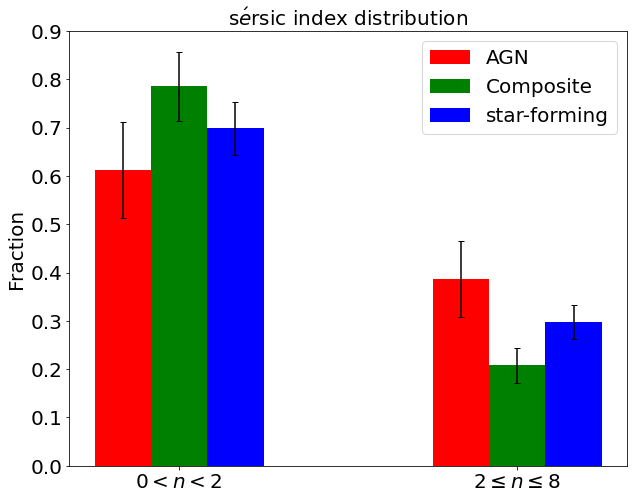

In [11]:
plt.figure(figsize=[10,8])
labels = ['$0 < n < 2$','$2 \leq n \leq 8$']
x_pos = np.array([0,0.3])#np.arange(len(labels))
width = 0.05
plt.bar(x_pos-0.05,hist2bar(agn_n,bins=[0,2,8],density=True)[0],width,yerr=hist2bar(agn_n,bins=[0,2,8],density=True)[1],label='AGN',color='red',capsize=3)
# plt.bar(x_pos-0.05,hist2bar(agn_l4p5_n,bins=[0,2,8],density=True)[0],width,yerr=hist2bar(agn_l4p5_n,bins=[0,2,8],density=True)[1],label='AGN($L_{4.5}^{Exc}$)',color='red',capsize=3)
plt.bar(x_pos,hist2bar(composite_n,bins=[0,2,8],density=True)[0],width,yerr=hist2bar(composite_n,bins=[0,2,8],density=True)[1],label='Composite',color='green',capsize=3)
plt.bar(x_pos+0.05,hist2bar(sf_n,bins=[0,2,8],density=True)[0],width,yerr=hist2bar(sf_n,bins=[0,2,8],density=True)[1],label='star-forming',color='blue',capsize=3)
plt.xticks(ticks=x_pos,labels=labels,fontsize=20)
plt.legend(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Fraction',fontsize=20)
plt.title(r's$\acute{e}$rsic index distribution',fontsize=20)
plt.savefig('/Users/lpr/Data/lirg_project/output/images/n_sedtype_3bins.png')

In [ ]:
# fig,axs=plt.subplots(1,4,figsize=(15,4),constrained_layout=True,sharex=True)
# # ============================ 1 st ============================
# axs[0].hist(agn_n,label='AGN_SED',color='red',bins=[0,2,8],align='right',width=1)#range=[0,8],
# # axs[0].legend(fontsize=15)
# axs[0].text(0.6,0.7,'n$_{median}$ = '+str(np.around(np.median(agn_n),2)),fontsize=10,transform=axs[0].transAxes)
# axs[0].set_xlim(0,8.5)
# axs[0].set_yticks(ticks=np.arange(0,43,12))
# axs[0].tick_params(labelsize=20)
# # ============================ 2 nd ============================
# axs[1].hist(agn_l4p5_n,label='AGN_$L_{4.5}^{exc}$',color='purple',bins=[0,2,8],align='right',width=1)#range=[0,8],
# # axs[1].legend(fontsize=15)
# axs[1].text(0.6,0.7,'n$_{median}$ = '+str(np.around(np.median(agn_l4p5_n),2)),fontsize=10,transform=axs[1].transAxes)
# axs[1].set_xlim(0,8.5)
# axs[1].set_yticks(ticks=np.arange(0,43,12))
# axs[1].tick_params(labelsize=20)
# # ============================ 3 rd ============================
# axs[2].hist(composite_n,label='composite',color='orange',bins=[0,2,8],align='right',width=1)#range=[0,8],
# # axs[2].legend(fontsize=15)
# axs[2].text(0.6,0.7,'n$_{median}$ = '+str(np.around(np.median(composite_n),2)),fontsize=10,transform=axs[2].transAxes)
# axs[2].set_xlim(0,8.5)
# axs[2].set_yticks(ticks=np.arange(0,127,42))
# axs[2].tick_params(labelsize=20)
# # ============================ 4 th ============================
# axs[3].hist(sf_n,label='star-forming',color='green',bins=[0,2,8],align='right',width=1)#range=[0,8],
# # axs[3].legend(fontsize=15)
# axs[3].text(0.6,0.7,'n$_{median}$ = '+str(np.around(np.median(sf_n),2)),fontsize=10,transform=axs[3].transAxes)
# axs[3].set_yticks(ticks=np.arange(0,151,50))
# # axs[3].set_xlabel('n',fontsize=20)
# axs[3].set_xlim(0,8.5)
# axs[3].set_xticks(ticks=[0,2,4,8])
# axs[3].tick_params(labelsize=20)
# fig.legend()
# fig.supylabel('Counts',fontsize=20)
# fig.supxlabel('n',fontsize=20)
# fig.suptitle(r's$\acute{e}$rsic index distribution',fontsize=20)
# fig.savefig('/Users/lpr/Documents/paper latex/abandoned-diagram/n_sedtype_3bins.pdf')

In [30]:
agn_re = np.concatenate((agn1['re_f160w'],agn2['re_f160w'],agn3['re_f160w']),axis=0)
composite_re = np.concatenate((composite1['re_f160w'],composite2['re_f160w'],composite3['re_f160w']),axis=0)
sf_re = np.concatenate((sf1['re_f160w'],sf2['re_f160w'],sf3['re_f160w']),axis=0)
# blue_compact_re = np.concatenate((blue_compact1['re_f160w'],blue_compact2['re_f160w'],blue_compact3['re_f160w']),axis=0)
agn_l4p5_re = np.concatenate((agn_1['re_f160w'],agn_2['re_f160w'],agn_3['re_f160w']),axis=0)

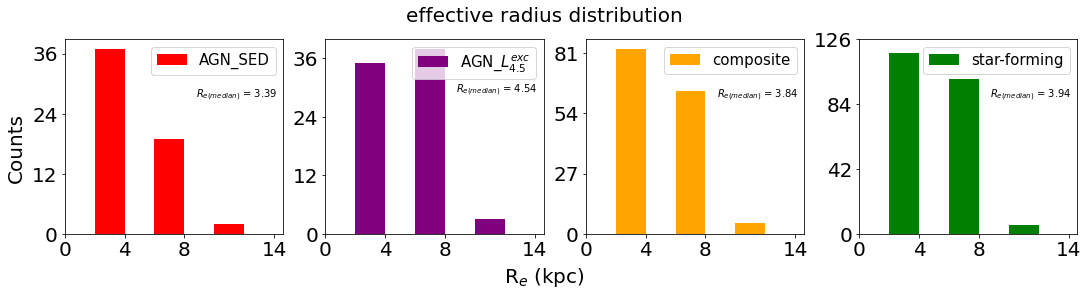

In [47]:
fig,axs=plt.subplots(1,4,figsize=(15,4),constrained_layout=True,sharex=True)
# ============================ 1 st ============================
axs[0].hist(agn_re,label='AGN_SED',color='red',bins=[0,4,8,12],range=[0,14],align='right',width=2)
axs[0].legend(fontsize=15)
axs[0].text(0.6,0.7,'$R_{e(median)}$ = '+str(np.around(np.median(agn_re),2)),fontsize=10,transform=axs[0].transAxes)
# axs[0].set_xlim(0,14.5)
axs[0].set_yticks(ticks=np.arange(0,43,12))
axs[0].tick_params(labelsize=20)
# ============================ 2 nd ============================
axs[1].hist(agn_l4p5_re,label='AGN_$L_{4.5}^{exc}$',color='purple',bins=[0,4,8,12],range=[0,14],align='right',width=2)
axs[1].legend(fontsize=15)
axs[1].text(0.6,0.73,'$R_{e(median)}$ = '+str(np.around(np.median(agn_l4p5_re),2)),fontsize=10,transform=axs[1].transAxes)
# axs[1].set_xlim(0,14.5)
axs[1].set_yticks(ticks=np.arange(0,43,12))
axs[1].tick_params(labelsize=20)
# ============================ 3 rd ============================
axs[2].hist(composite_re,label='composite',color='orange',bins=[0,4,8,12],range=[0,14],align='right',width=2)
axs[2].legend(fontsize=15)
axs[2].text(0.6,0.7,'$R_{e(median)}$ = '+str(np.around(np.median(composite_re),2)),fontsize=10,transform=axs[2].transAxes)
# axs[2].set_xlim(0,14.5)
axs[2].set_yticks(ticks=np.arange(0,82,27))
axs[2].tick_params(labelsize=20)
# ============================ 4 th ============================
axs[3].hist(sf_re,label='star-forming',color='green',bins=[0,4,8,12],range=[0,14],align='right',width=2)
axs[3].legend(fontsize=15)
axs[3].text(0.6,0.7,'$R_{e(median)}$ = '+str(np.around(np.median(sf_re),2)),fontsize=10,transform=axs[3].transAxes)
# axs[3].set_xlim(0,14.5)
axs[3].set_yticks(ticks=np.arange(0,127,42))
axs[3].set_xticks(ticks=[0,4,8,14])
axs[3].tick_params(labelsize=20)
fig.supylabel('Counts',fontsize=20)
fig.supxlabel(r'R$_e$ (kpc)',fontsize=20)
fig.suptitle('effective radius distribution',fontsize=20)
fig.savefig('/Users/lpr/Documents/paper latex/abandoned-diagram/re_sedtype_3bins.pdf')
# fig,axs=plt.subplots(4,1,figsize=(13,16),constrained_layout=True,sharex=True)
# # ============================ 1 st ============================
# axs[0].hist(agn_re,label='AGN_SED',color='red',bins=28,range=[0,14],align='right',width=0.4)
# axs[0].legend(fontsize=15)
# axs[0].text(11,10,'$R_{e(median)}$ = '+str(np.around(np.median(agn_re),2)),fontsize=20)
# axs[0].set_xlim(0,14.5)
# axs[0].set_yticks(ticks=np.arange(0,16,3))
# axs[0].tick_params(labelsize=20)
# # ============================ 2 nd ============================
# axs[1].hist(agn_l4p5_re,label='AGN_$L_{4.5}^{exc}$',color='purple',bins=28,range=[0,14],align='right',width=0.4)
# axs[1].legend(fontsize=15)
# axs[1].text(11,7.3,'$R_{e(median)}$ = '+str(np.around(np.median(agn_l4p5_re),2)),fontsize=20)
# axs[1].set_xlim(0,14.5)
# axs[1].set_yticks(ticks=np.arange(0,14,3))
# axs[1].tick_params(labelsize=20)
# # ============================ 3 rd ============================
# axs[2].hist(composite_re,label='composite',color='orange',bins=28,range=[0,14],align='right',width=0.4)
# axs[2].legend(fontsize=15)
# axs[2].text(11,15,'$R_{e(median)}$ = '+str(np.around(np.median(composite_re),2)),fontsize=20)
# axs[2].set_xlim(0,14.5)
# axs[2].set_yticks(ticks=np.arange(0,26,6))
# axs[2].tick_params(labelsize=20)
# # ============================ 4 th ============================
# axs[3].hist(sf_re,label='star-forming',color='green',bins=28,range=[0,14],align='right',width=0.4)
# axs[3].legend(fontsize=15)
# axs[3].text(11,18,'$R_{e(median)}$ = '+str(np.around(np.median(sf_re),2)),fontsize=20)
# axs[3].set_xlim(0,14.5)
# axs[3].set_yticks(ticks=np.arange(0,30,7))
# axs[3].set_xlabel(r'R$_e$ (kpc)',fontsize=20)
# axs[3].set_xticks(ticks=np.arange(0,14.5,1))
# axs[3].tick_params(labelsize=20)
# fig.supylabel('Counts',fontsize=20)
# fig.suptitle('effective radius distribution',fontsize=20)
# fig.savefig('/Users/lpr/Documents/paper latex/re_sedtype.pdf')
# plt.figure(figsize=(13,16))
# ax1 = plt.subplot(411)#=================
# plt.hist(agn_re,label='AGN_SED',color='red',bins=28,range=[0,14],align='right',width=0.4)#re:range to 15
# plt.legend(fontsize=15)
# plt.text(12,16.5,'ALL: '+str(len(hdu1)+len(hdu2)+len(hdu3)),fontsize=20)
# plt.text(11,10,'$R_{e(median)}$ = '+str(np.around(np.median(agn_re),2)),fontsize=20)
# plt.setp(ax1.get_xticklabels(), visible=False)
# plt.title('effective radius distribution',fontsize=20)
# plt.xlim(0,14.5)
# plt.yticks(ticks=np.arange(0,16,3),fontsize=20)
# ax1 = plt.subplot(412)#=================
# plt.hist(agn_l4p5_re,label='AGN_$L_{4.5}^{exc}$',color='purple',bins=28,range=[0,14],align='right',width=0.4)#re:range to 15
# plt.legend(fontsize=15)
# plt.text(11,7,'$R_{e(median)}$ = '+str(np.around(np.median(agn_l4p5_re),2)),fontsize=20)
# plt.setp(ax1.get_xticklabels(), visible=False)
# plt.xlim(0,14.5)
# plt.yticks(ticks=np.arange(0,14,3),fontsize=20)
# ax2 = plt.subplot(413,sharex=ax1)#=================
# plt.hist(composite_re,label='composite',color='orange',bins=28,range=[0,14],align='right',width=0.4)
# plt.legend(fontsize=15)
# plt.text(11,15,'$R_{e(median)}$ = '+str(np.around(np.median(composite_re),2)),fontsize=20)
# plt.ylabel('counts',fontsize=20)
# plt.setp(ax2.get_xticklabels(), visible=False)
# plt.yticks(ticks=np.arange(0,26,6),fontsize=20)
# ax3 = plt.subplot(414,sharex=ax1)#=================
# plt.hist(sf_re,label='star forming',color='green',bins=28,range=[0,14],align='right',width=0.4)
# plt.legend(fontsize=15)
# plt.text(11,20,'$R_{e(median)}$ = '+str(np.around(np.median(sf_re),2)),fontsize=20)
# plt.yticks(ticks=np.arange(0,36,8),fontsize=20)
# plt.xlabel(r'R$_e$ (kpc)',fontsize=20)
# plt.xticks(ticks=np.arange(0,14.5,1),fontsize=20)
# plt.savefig('/Users/lpr/Documents/paper latex/re_sedtype.pdf')
# plt.figure(figsize=(13,16))
# ax1 = plt.subplot(411)#=================
# plt.hist(agn_re,label='AGN_SED',color='red',bins=28,range=[0,14],align='right',width=0.4)#re:range to 15
# plt.legend(fontsize=15)
# plt.text(12,16.5,'ALL: '+str(len(hdu1)+len(hdu2)+len(hdu3)),fontsize=20)
# plt.text(11,10,'$R_{e(median)}$ = '+str(np.around(np.median(agn_re),2)),fontsize=20)
# plt.setp(ax1.get_xticklabels(), visible=False)
# plt.title('effective radius distribution',fontsize=20)
# plt.xlim(0,14.5)
# plt.yticks(ticks=np.arange(0,16,3),fontsize=20)
# ax1 = plt.subplot(412)#=================
# plt.hist(agn_l4p5_re,label='AGN_$L_{4.5}^{exc}$',color='purple',bins=28,range=[0,14],align='right',width=0.4)#re:range to 15
# plt.legend(fontsize=15)
# plt.text(11,7,'$R_{e(median)}$ = '+str(np.around(np.median(agn_l4p5_re),2)),fontsize=20)
# plt.setp(ax1.get_xticklabels(), visible=False)
# plt.xlim(0,14.5)
# plt.yticks(ticks=np.arange(0,14,3),fontsize=20)
# ax2 = plt.subplot(413,sharex=ax1)#=================
# plt.hist(composite_re,label='composite',color='orange',bins=28,range=[0,14],align='right',width=0.4)
# plt.legend(fontsize=15)
# plt.text(11,15,'$R_{e(median)}$ = '+str(np.around(np.median(composite_re),2)),fontsize=20)
# plt.ylabel('counts',fontsize=20)
# plt.setp(ax2.get_xticklabels(), visible=False)
# plt.yticks(ticks=np.arange(0,26,6),fontsize=20)
# ax3 = plt.subplot(414,sharex=ax1)#=================
# plt.hist(sf_re,label='star forming',color='green',bins=28,range=[0,14],align='right',width=0.4)
# plt.legend(fontsize=15)
# plt.text(11,20,'$R_{e(median)}$ = '+str(np.around(np.median(sf_re),2)),fontsize=20)
# plt.yticks(ticks=np.arange(0,36,8),fontsize=20)
# plt.xlabel(r'R$_e$ (kpc)',fontsize=20)
# plt.xticks(ticks=np.arange(0,14.5,1),fontsize=20)
# plt.savefig('/Users/lpr/Documents/paper latex/re_sedtype.pdf')

In [55]:
from scipy.integrate import quad
import matplotlib.pyplot as plt
def dc(x,lambda0,m0):
    hz=np.sqrt(lambda0+m0*(1+x)**3)
    return 1/hz
H0=70 # km/s/Mpc, nowadays commonly used
Lambda0=0.7
M0=0.3
def kpc_per_arcsec(z):
    angular_distance=((3*10**5)/H0)*quad(dc,0,z,args=(Lambda0,M0))[0]/(1+z)
    arc_scale = angular_distance*np.pi*1000/(180*3600)
    return(arc_scale)
from astropy.io import fits
import numpy as np
hdu1 = fits.open('/Users/lpr/Data/fits/expdata/HST/goodss_all/goodss_Huangall_radecmatch_modifyz.fits')[1].data
hdu2 = fits.open('/Users/lpr/Data/fits/expdata/HST/goodsn_all/goodsn_Huangall_radecmatch_modifyz.fits')[1].data
hdu3 = fits.open('/Users/lpr/Data/fits/expdata/HST/aegis_all/aegis_Huangall_radecmatch_modifyz.fits')[1].data
# Huang(2021) selected galaxies with 0.8<z<1.3
hdu1 = hdu1[np.where((hdu1['Separation']<0.3)&(hdu1['z_used']>0.8)&(hdu1['z_used']<1.3)&(hdu1['LIR_FULL']>0))]
hdu2 = hdu2[np.where((hdu2['Separation']<0.3)&(hdu2['z_used']>0.8)&(hdu2['z_used']<1.3)&(hdu2['LIR_FULL']>0))]
hdu3 = hdu3[np.where((hdu3['Separation']<0.3)&(hdu3['z_used']>0.8)&(hdu3['z_used']<1.3)&(hdu3['LIR_FULL']>0))]#(hdu3['MASS']>1)&
# hdu1 = hdu1[np.where((hdu1['f_f160w']==1)|(hdu1['f_f160w']==0))]#
# hdu2 = hdu2[np.where((hdu2['f_f160w']==1)|(hdu2['f_f160w']==0))]#
# hdu3 = hdu3[np.where((hdu3['f_f160w']==1)|(hdu3['f_f160w']==0))]#
for num1 in range(0,len(hdu1)):
    hdu1[num1]['re_f160w'] = hdu1[num1]['re_f160w']*kpc_per_arcsec(hdu1[num1]['z_used'])
for num2 in range(0,len(hdu2)):
    hdu2[num2]['re_f160w'] = hdu2[num2]['re_f160w']*kpc_per_arcsec(hdu2[num2]['z_used'])
for num3 in range(0,len(hdu3)):
    hdu3[num3]['re_f160w'] = hdu3[num3]['re_f160w']*kpc_per_arcsec(hdu3[num3]['z_used'])

In [56]:
disky1 = hdu1[np.where((hdu1['n_f160w']<2)&(hdu1['L4P5EX']>0))]
disky2 = hdu2[np.where((hdu2['n_f160w']<2)&(hdu2['L4P5EX']>0))]
disky3 = hdu3[np.where((hdu3['n_f160w']<2)&(hdu3['L4P5EX']>0))]
bulgy1 = hdu1[np.where((hdu1['n_f160w']>2)&(hdu1['L4P5EX']>0))]
bulgy2 = hdu2[np.where((hdu2['n_f160w']>2)&(hdu2['L4P5EX']>0))]
bulgy3 = hdu3[np.where((hdu3['n_f160w']>2)&(hdu3['L4P5EX']>0))]
disky_l4p5ex = np.concatenate((disky1['L4P5EX'],disky2['L4P5EX'],disky3['L4P5EX']),axis=0)
bulgy_l4p5ex = np.concatenate((bulgy1['L4P5EX'],bulgy2['L4P5EX'],bulgy3['L4P5EX']),axis=0)

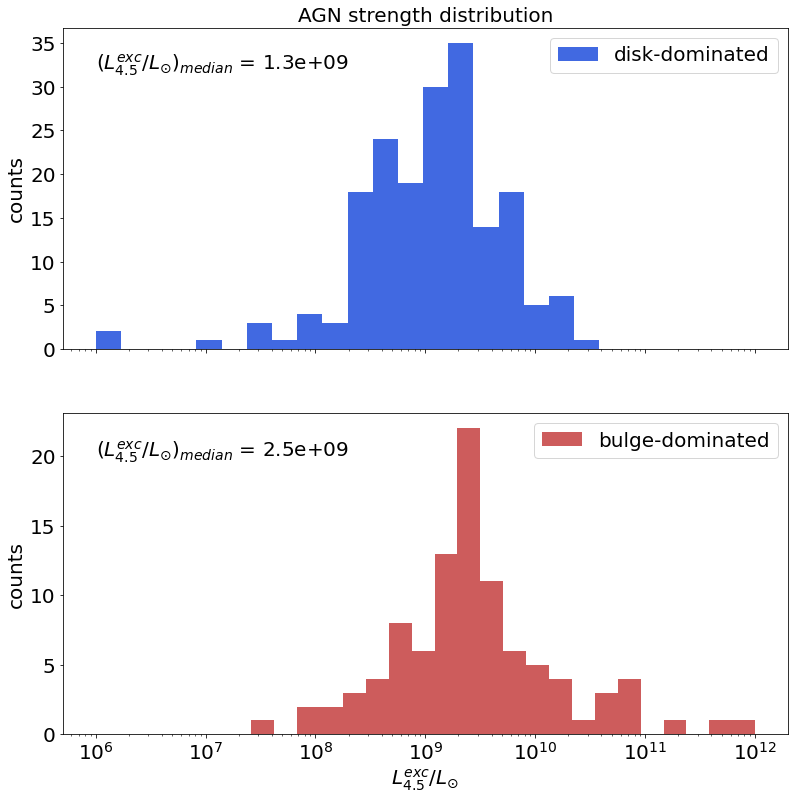

In [72]:
plt.figure(figsize=(13,13))
ax1 = plt.subplot(211)#=============================================================================
plt.hist(disky_l4p5ex,bins=10**np.linspace(6,11.5,25),color='royalblue',linewidth=3,align='mid',label='disk-dominated')
plt.legend(fontsize=20)
plt.text(1e6,32,'$(L_{4.5}^{exc}/L_{\odot})_{median}$ = '+'{:.2g}'.format(np.median(disky_l4p5ex)),fontsize=20)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.title('AGN strength distribution',fontsize=20)
plt.xscale('log')
plt.yticks(fontsize=20)
plt.ylabel('counts',fontsize=20)
ax2 = plt.subplot(212,sharex=ax1)#=============================================================================
plt.hist(bulgy_l4p5ex,bins=10**np.linspace(7,12,25),color='indianred',linewidth=3,align='mid',label='bulge-dominated')
plt.legend(fontsize=20)
plt.text(1e6,20,'$(L_{4.5}^{exc}/L_{\odot})_{median}$ = '+'{:.2g}'.format(np.median(bulgy_l4p5ex)),fontsize=20)
plt.xscale('log')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('$L_{4.5}^{exc}/L_{\odot}$',fontsize=20)
plt.ylabel('counts',fontsize=20)
plt.savefig('/Users/lpr/Documents/paper latex/agn_distribution.pdf')

In [24]:
print(np.min(bulgy_l4p5ex))
print(np.median(bulgy_l4p5ex))
print(np.max(bulgy_l4p5ex))
print(np.min(disky_l4p5ex))
print(np.median(disky_l4p5ex))
print(np.max(disky_l4p5ex))

35908276.0
2360403200.0
480715370000.0
1379553.4
1265019100.0
61689053000.0


([<matplotlib.axis.XTick at 0x7fb4a8fc0940>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

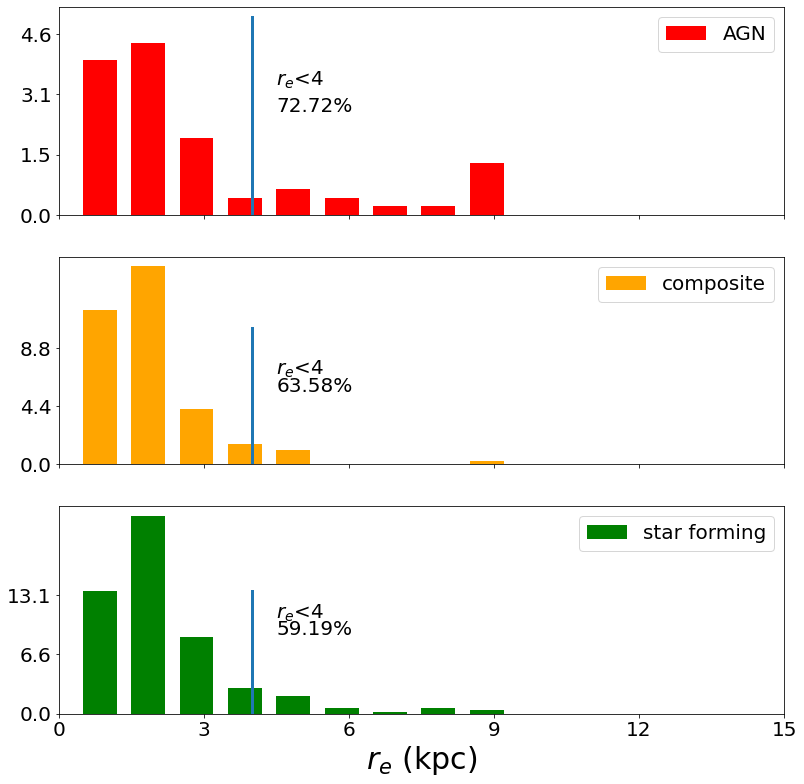

In [7]:
plt.figure(figsize=(13,13))
ax1 = plt.subplot(311)#====================
plt.hist(agn_n,label='AGN',color='red',bins=15,range=[0,15],align='right',width=0.7)
plt.legend(fontsize=20)
plt.plot([4,4],[0,23],linewidth=3)
plt.text(4.5,12,'72.72%',fontsize=20)
plt.text(4.5,15,'$r_e$<4',fontsize=20)
# plt.text(12,22,'ALL: '+str(len(hdu1)+len(hdu2)+len(hdu3)),fontsize=20)
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.title('$r_e$ fraction distribution(%)',fontsize=20)
plt.xlim(0,15)
plt.yticks(ticks=np.arange(0,23,7),labels=np.around(100*np.arange(0,23,7)/(len(hdu1)+len(hdu2)+len(hdu3)),1),fontsize=20)
ax2 = plt.subplot(312,sharex=ax1)#====================
plt.hist(composite_n,label='composite',color='orange',bins=15,range=[0,15],align='right',width=0.7)
plt.legend(fontsize=20)
plt.plot([4,4],[0,47],linewidth=3)
plt.text(4.5,25,'63.58%',fontsize=20)
plt.text(4.5,31,'$r_e$<4',fontsize=20)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.yticks(ticks=np.arange(0,47,20),labels=np.around(100*np.arange(0,47,20)/(len(hdu1)+len(hdu2)+len(hdu3)),1),fontsize=20)
ax3 = plt.subplot(313,sharex=ax1)#====================
plt.hist(sf_n,label='star forming',color='green',bins=15,range=[0,15],align='right',width=0.7)
plt.legend(fontsize=20)
plt.plot([4,4],[0,62],linewidth=3)
plt.text(4.5,40,'59.19%',fontsize=20)
plt.text(4.5,48,'$r_e$<4',fontsize=20)
plt.yticks(ticks=np.arange(0,62,30),labels=np.around(100*np.arange(0,62,30)/(len(hdu1)+len(hdu2)+len(hdu3)),1),fontsize=20)
plt.xlabel('$r_e$ (kpc)',fontsize=30)
plt.xticks(ticks=np.arange(0,16,3),fontsize=20)
#plt.savefig('/Users/lpr/Desktop/yixing-meeting/re_freq-5class_exc_text.eps')
#plt.savefig('/Users/lpr/Data/fits/expdata/HST/egs_all/plot/re_freq-5class_exc.eps')